# Espaço de cores
## Aula 3.2
* Espaço de cores é um modelo abstrato matemático para formalizar a descrição de cores de acordo com um conjunto de propriedades básicas e reprodutíveis;
* Normalmente, a representação de cores são tridimensionais. Alguns modelos incluem RGB, CMY, CMYK, HSV, XYZ, YIQ, L\*a\*b\*, YCbCr etc.

## Modelo RGB
* Formado pelas cores **<font color="red">vermelho (R)</font>**, **<font color="green">verde (G)</font>** e **<font color="blue">azul (B)</font>**;
* Em termos técnicos, as cores primárias não podem ser formadas por misturas de nenhuma outra cor;
* Modelo **aditivo**. Combinar as cores gera branco;
* Comumente utilizados em displays de vídeo.
![rgb_cube.PNG](attachment:rgb_cube.PNG)

* Uma cor secundária é a soma de duas cores primárias;
* Cada cor secundária é o complemento de uma cor primária.
![rgb.PNG](attachment:rgb.PNG)

## Modelo CMY(K)
* Formado pelas cores **<font color="cyan">ciano (C)</font>**, **<font color="magenta">magenta (M)</font>** e **<font color="yellow">amarelo (Y)</font>**;
* Modelo **subtrativo**. A mistura de dois pigmentos reflete apenas a cor que não é absorvida por nenhum deles;
* Noramelmente utilizado em impressões;
* Adicionalmente, pode ter um componente **<font color="black">preto (K)</font>**, por ser mais fácil a sua obtenção numa impressão do que misturar as cores.
![cmy.PNG](attachment:cmy.PNG)

## Modelo HSV
* Modelo mais intuitivo para humanos;
* Consiste em três propriedades mais relevantes à percepção humana:
* **Hue** (Matiz ou Tonalidade): Varia de 0° a 360°, abrangendo as cores do espectro (0° é <font color="red">vermelho</font>);
* **Saturation** (Saturação, também chamada de Pureza): Varia de 0% a 100%. Quanto menor este valor, mais cinza ficará a imagem. Quanto maior este valor, mais "pura" é a cor;
* **Value** (Valor ou Brilho): Varia de 0% a 100%, onde 0% é preto e 100% a cor mais clara.
* Também conhecido como HSB (B - brilho).

| ![HSV_color_solid_cone.png](attachment:HSV_color_solid_cone.png) | ![HSV_color_solid_cylinder.png](attachment:HSV_color_solid_cylinder.png) |
|-|-|

![220px-Triangulo_HSV.png](attachment:220px-Triangulo_HSV.png)

### <font color="red">R</font><font color="green">G</font><font color="blue">B</font> para <font color="cyan">C</font><font color="magenta">M</font><font color="yellow">Y</font>
$$\begin{pmatrix}
    C \\ M \\ Y
\end{pmatrix} = \begin{pmatrix}
    1 \\ 1 \\ 1
\end{pmatrix} - \begin{pmatrix}
    R \\ G \\ B
\end{pmatrix} e \begin{pmatrix}
    R \\ G \\ B
\end{pmatrix} = \begin{pmatrix}
    1 \\ 1 \\ 1
\end{pmatrix} - \begin{pmatrix}
    C \\ M \\ Y
\end{pmatrix}$$
* **<font color="red">R</font>** + **<font color="cyan">C</font>** = 1 (ou 255);
* **<font color="green">G</font>** + **<font color="magenta">M</font>** = 1;
* **<font color="blue">B</font>** + **<font color="yellow">Y</font>** = 1.

In [3]:
#iterativo
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

img = Image.open(r"C:\Users\vish8\OneDrive\Desktop\P7\C209\codigos\aula 03 transformacoes geometricas e espacos de cores\colors_rgb.png")
img_rgb = np.array(img)
l, c, p = img_rgb.shape

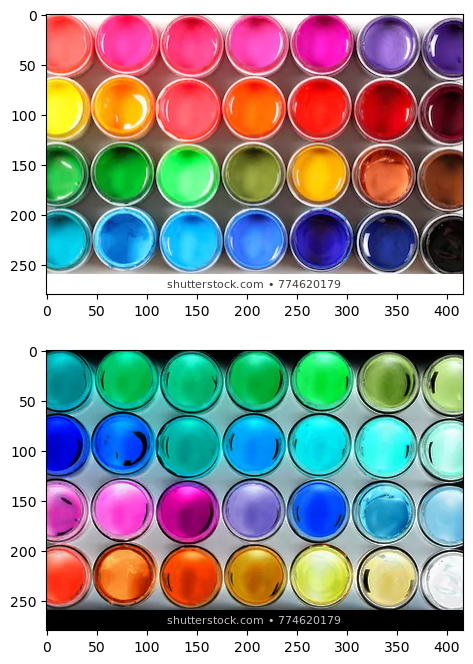

In [4]:
img_cmy = np.zeros(shape = img_rgb.shape, dtype = np.float64)
for i in range(l):
    for j in range(c):
        r = img_rgb[i, j, 0]
        g = img_rgb[i, j, 1]
        b = img_rgb[i, j, 2]
        img_cmy[i, j, 0] = (255 - r)/255 #C
        img_cmy[i, j, 1] = (255 - g)/255
        img_cmy[i, j, 2] = (255 - b)/255
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(img_rgb)
plt.subplot(2, 1, 2)
plt.imshow(img_cmy)        

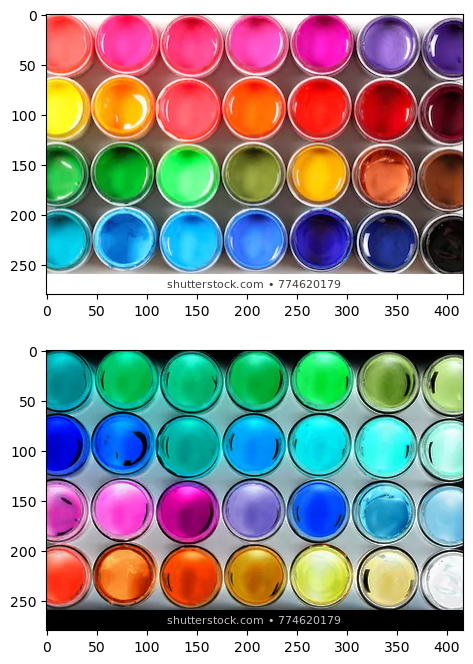

In [5]:
#Usando numpy
img_cmy = (255 - img_rgb)/ 255
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(img_rgb)
plt.subplot(2, 1, 2)
plt.imshow(img_cmy)
plt.show()

Para conferir se o resultado da conversão está correta:
1. Escolha pixels arbitrários da **imagem original**, obtendo os valores dos três canais **<font color="red">R</font>**, **<font color="green">G</font>** e **<font color="blue">B</font>**. Utilizando algum conversor online, converta para **<font color="cyan">C</font><font color="magenta">M</font><font color="yellow">Y</font>**. E.g.: http://colormine.org/convert/rgb-to-cmy;
2. Na **imagem resultante**, obtenha os valores dos três canais **<font color="cyan">C</font>**, **<font color="magenta">M</font>** e **<font color="yellow">Y</font>**, nas mesmas coordenadas escolhidas na imagem original;
3. Adeque os valores de **<font color="cyan">C</font><font color="magenta">M</font><font color="yellow">Y</font>** à faixa do conversor online, caso necessário;
4. Compare os valores **<font color="cyan">C</font><font color="magenta">M</font><font color="yellow">Y</font>** entre sua imagem e aquela do conversor online. Se forem iguais, a conversão está correta; se diferentes, a conversão foi realizada incorretamente.

In [7]:
random_y = np.random.randint(i)
random_x = np.random.randint(j)
print('RGB[{}, {}]: {}'.format(random_y, random_x, img_rgb[random_y, random_x]))
print('CMY[{}, {}]: {}'.format(random_y, random_x, img_cmy[random_y, random_x]))

RGB[7, 116]: [255 254 250]
CMY[7, 116]: [0.         0.00392157 0.01960784]


Outra alternativa para verificar:
1. Converta a imagem **<font color="red">R</font><font color="green">G</font><font color="blue">B</font>** original para imagem **<font color="cyan">C</font><font color="magenta">M</font><font color="yellow">Y</font>** utilizando o método `minha_imagem_pil_rgb.convert('CMYK')`;
2. Remova o canal **K**;
3. Exiba as duas imagens com o MatPlotLib;
4. Caso sejam iguais, sua conversão está correta.

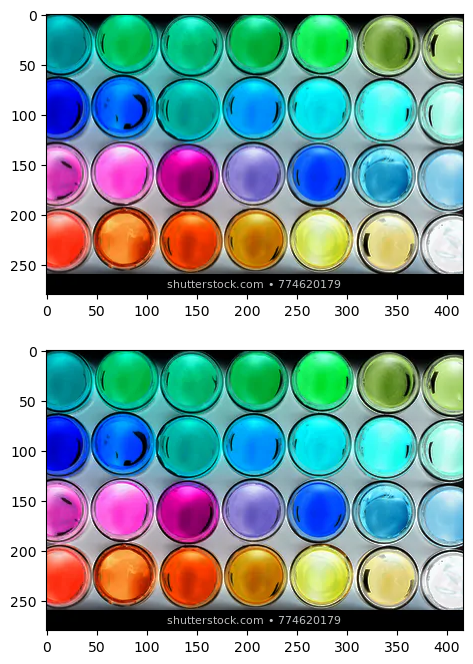

In [8]:
#Verificaçao
img_cmy_verify = np.array(img.convert('CMYK'))[:, :, :3]
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.imshow(img_cmy_verify)
plt.subplot(2, 1, 2)
plt.imshow(img_cmy)

### <font color="red">R</font><font color="green">G</font><font color="blue">B</font> para HSV

$$\begin{pmatrix}
    R \\ G \\  B
\end{pmatrix} = \begin{pmatrix}
    \frac{R'}{255} \\ \frac{G'}{255} \\ \frac{B'}{255}
\end{pmatrix}$$

$$C_{max} = max(R, G, B)$$
$$C_{min} = min(R, G, B)$$
$$\Delta = C_{max} - C_{min}$$

$$H = \left\{
\begin{array}{ll}
      0°                                & se \quad \Delta=0 \\
      60°\times\frac{G-B}{\Delta} + 0   & se \quad C_{max}=R \quad e \quad G \geq B \\
      60°\times\frac{G-B}{\Delta} + 360 & se \quad C_{max}=R \quad e \quad G < B \\
      60°\times\frac{B-R}{\Delta} + 120 & se \quad C_{max}=G \\
      60°\times\frac{R-G}{\Delta} + 240 & se \quad C_{max}=B \\
\end{array} 
\right.$$
$$S = \frac{\Delta}{C_{max}}$$
$$V = C_{max}$$

![HSV-RGB-comparison.svg](attachment:HSV-RGB-comparison.svg)